In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
sales_data=pd.read_csv("E:\Analytics- IPBA\project\Final FIle_BYOP_GRP-J-2708\Final FIle_BYOP_GRP-J-2708/Sales Details Group-J.csv")
sales_data.head(10)

,RSM,DSM,ASM,SOE,DistributorCode,CityName,Sales_Invoice_Date,Invoice_No,Retailer_Code,CategoryName,Sales_Quantity,Sales_Gross_Value,Tax_Amount,Scheme_Discount,Sales_Net_Value
0,Z02R05,Z02R05D02,Z02R05D02A02,Z02R05D02A02S08,1004438,ADAPUR,22-06-2021,P2102428,1.000000e+13,Biscuits,1,7.70,1.39,0.0,9.09
1,Z02R05,Z02R05D02,Z02R05D02A02,Z02R05D02A02S08,1004438,ADAPUR,28-06-2021,P2102591,1.000000e+13,Biscuits,1,3.85,0.69,0.0,4.55
2,Z02R05,Z02R05D02,Z02R05D02A02,Z02R05D02A02S08,1004438,ADAPUR,23-06-2021,P2102451,1.000000e+13,Biscuits,1,7.57,1.36,0.0,8.93
3,Z02R04,Z02R04D04,Z02R04D04A01,Z02R04D04A01S03,1006646,Agartala,29-06-2021,P2101115,1.010000e+13,Biscuits,1,113.50,20.43,0.0,133.93
4,Z02R04,Z02R04D04,Z02R04D04A01,Z02R04D04A01S03,1006646,Agartala,13-06-2021,P2100740,1.010000e+13,Biscuits,1,3.78,0.68,0.0,4.46
5,Z02R04,Z02R04D04,Z02R04D04A01,Z02R04D04A01S03,1006646,Agartala,29-06-2021,P2101055,1.010000e+13,Biscuits,1,113.50,20.43,0.0,133.93
6,Z02R01,Z02R01D01,Z02R01D01A01,Z02R01D01A01E04,1005750,AMTALA,08-06-2021,P2102748,1.010000e+13,Biscuits,1,90.80,16.34,0.0,107.14
7,Z02R01,Z02R01D03,Z02R01D03A04,Z02R01D03A04S05,1014344,ANGUL,17-06-2021,P2104766,1.010000e+13,Biscuits,1,7.63,1.37,0.0,9.01
8,Z02R01,Z02R01D03,Z02R01D03A04,Z02R01D03A04S05,1014344,ANGUL,15-06-2021,P2104403,1.010000e+13,Biscuits,1,756.66,136.20,0.0,892.86
9,Z02R01,Z02R01D03,Z02R01D03A03,Z02R01D03A03E03,1012535,ASKA,08-06-2021,P2100811,1.010000e+13,Biscuits,1,113.50,20.43,0.0,133.93


In [3]:
sales_data.shape

(663512, 15)

In [4]:
sales_data_Copy1 = sales_data.copy()

In [5]:
sales_data_Copy1.isna().sum()

RSM                   0
DSM                   0
ASM                   0
SOE                   0
DistributorCode       0
CityName              0
Sales_Invoice_Date    0
Invoice_No            0
Retailer_Code         0
CategoryName          0
Sales_Quantity        0
Sales_Gross_Value     0
Tax_Amount            0
Scheme_Discount       0
Sales_Net_Value       0
dtype: int64

In [6]:
sales_data_Copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663512 entries, 0 to 663511
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   RSM                 663512 non-null  object 
 1   DSM                 663512 non-null  object 
 2   ASM                 663512 non-null  object 
 3   SOE                 663512 non-null  object 
 4   DistributorCode     663512 non-null  int64  
 5   CityName            663512 non-null  object 
 6   Sales_Invoice_Date  663512 non-null  object 
 7   Invoice_No          663512 non-null  object 
 8   Retailer_Code       663512 non-null  float64
 9   CategoryName        663512 non-null  object 
 10  Sales_Quantity      663512 non-null  int64  
 11  Sales_Gross_Value   663512 non-null  float64
 12  Tax_Amount          663512 non-null  float64
 13  Scheme_Discount     663512 non-null  float64
 14  Sales_Net_Value     663512 non-null  float64
dtypes: float64(5), int64(2), object(8)

In [7]:
sales_data_Copy1.columns=[i.lower() for i in sales_data_Copy1.columns]
sales_data_Copy1.columns=[i.replace(' ', '_') for i in sales_data_Copy1.columns]

print(sales_data_Copy1.columns)

Index(['rsm', 'dsm', 'asm', 'soe', 'distributorcode', 'cityname',
       'sales_invoice_date', 'invoice_no', 'retailer_code', 'categoryname',
       'sales_quantity', 'sales_gross_value', 'tax_amount', 'scheme_discount',
       'sales_net_value'],
      dtype='object')


In [8]:
sales_data_Copy1['sales_invoice_date']=pd.to_datetime(sales_data_Copy1['sales_invoice_date'], format='%d-%m-%Y')
sales_data_Copy1['cityname'] = sales_data_Copy1['cityname'].astype('string')
sales_data_Copy1['invoice_no'] = sales_data_Copy1['invoice_no'].astype('string')
sales_data_Copy1['categoryname'] = sales_data_Copy1['categoryname'].astype('string')
sales_data_Copy1['rsm'] = sales_data_Copy1['rsm'].astype('string')
sales_data_Copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663512 entries, 0 to 663511
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rsm                 663512 non-null  string        
 1   dsm                 663512 non-null  object        
 2   asm                 663512 non-null  object        
 3   soe                 663512 non-null  object        
 4   distributorcode     663512 non-null  int64         
 5   cityname            663512 non-null  string        
 6   sales_invoice_date  663512 non-null  datetime64[ns]
 7   invoice_no          663512 non-null  string        
 8   retailer_code       663512 non-null  float64       
 9   categoryname        663512 non-null  string        
 10  sales_quantity      663512 non-null  int64         
 11  sales_gross_value   663512 non-null  float64       
 12  tax_amount          663512 non-null  float64       
 13  scheme_discount     663512 no

In [9]:
sales_data_Copy1.head(20)

,rsm,dsm,asm,soe,distributorcode,cityname,sales_invoice_date,invoice_no,retailer_code,categoryname,sales_quantity,sales_gross_value,tax_amount,scheme_discount,sales_net_value
0,Z02R05,Z02R05D02,Z02R05D02A02,Z02R05D02A02S08,1004438,ADAPUR,2021-06-22,P2102428,1.000000e+13,Biscuits,1,7.70,1.39,0.0,9.09
1,Z02R05,Z02R05D02,Z02R05D02A02,Z02R05D02A02S08,1004438,ADAPUR,2021-06-28,P2102591,1.000000e+13,Biscuits,1,3.85,0.69,0.0,4.55
2,Z02R05,Z02R05D02,Z02R05D02A02,Z02R05D02A02S08,1004438,ADAPUR,2021-06-23,P2102451,1.000000e+13,Biscuits,1,7.57,1.36,0.0,8.93
3,Z02R04,Z02R04D04,Z02R04D04A01,Z02R04D04A01S03,1006646,Agartala,2021-06-29,P2101115,1.010000e+13,Biscuits,1,113.50,20.43,0.0,133.93
4,Z02R04,Z02R04D04,Z02R04D04A01,Z02R04D04A01S03,1006646,Agartala,2021-06-13,P2100740,1.010000e+13,Biscuits,1,3.78,0.68,0.0,4.46
5,Z02R04,Z02R04D04,Z02R04D04A01,Z02R04D04A01S03,1006646,Agartala,2021-06-29,P2101055,1.010000e+13,Biscuits,1,113.50,20.43,0.0,133.93
6,Z02R01,Z02R01D01,Z02R01D01A01,Z02R01D01A01E04,1005750,AMTALA,2021-06-08,P2102748,1.010000e+13,Biscuits,1,90.80,16.34,0.0,107.14
7,Z02R01,Z02R01D03,Z02R01D03A04,Z02R01D03A04S05,1014344,ANGUL,2021-06-17,P2104766,1.010000e+13,Biscuits,1,7.63,1.37,0.0,9.01
8,Z02R01,Z02R01D03,Z02R01D03A04,Z02R01D03A04S05,1014344,ANGUL,2021-06-15,P2104403,1.010000e+13,Biscuits,1,756.66,136.20,0.0,892.86
9,Z02R01,Z02R01D03,Z02R01D03A03,Z02R01D03A03E03,1012535,ASKA,2021-06-08,P2100811,1.010000e+13,Biscuits,1,113.50,20.43,0.0,133.93


<BarContainer object of 5 artists>

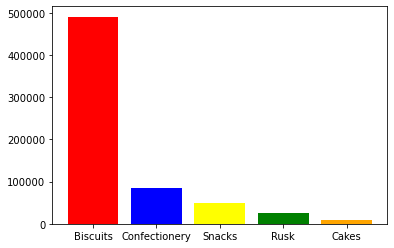

In [10]:
cn=sales_data_Copy1['categoryname'].value_counts()
list(cn)
plt.bar(list(cn.index), list(cn.values), color=['red','blue','yellow','green', 'orange'])                                        

<AxesSubplot:xlabel='rsm', ylabel='count'>

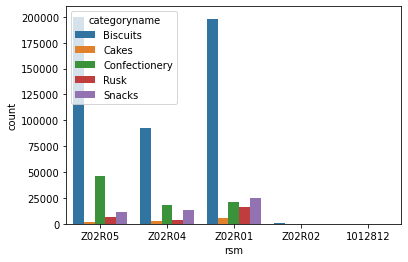

In [11]:
sns.countplot(x='rsm',data=sales_data_Copy1,hue= 'categoryname')

## Possible Conclusions 
 - zo2ro4 most likely a smaller area
 - zo2ro2 has the least area under his purview
 - z02r05 and z02r01 most like have a large area under their purview
 - Even though z02r05 has such large area, the sales of all categories except biscuits is less than z02r01
 - z02r04 is doing relatively well for their small area


In [12]:
sales_data_Copy1[sales_data_Copy1.rsm == '1012812']

,rsm,dsm,asm,soe,distributorcode,cityname,sales_invoice_date,invoice_no,retailer_code,categoryname,sales_quantity,sales_gross_value,tax_amount,scheme_discount,sales_net_value
663509,1012812,Z02R04D04,Z02R04D04A07,Z02R04D04A07S04,1012812,Nalbari,2021-06-09,P2100091,1.010000e+13,Snacks,81360,277495.69,31301.51,16649.74,292147.46


In [13]:
sales_data_Copy1 = sales_data_Copy1[sales_data_Copy1.rsm != '1012812']

In [14]:
sales_data_copy2 = sales_data_Copy1.copy()
sales_data_Copy1.shape

(663511, 15)

In [15]:
sales_data_Copy1[sales_data_Copy1.rsm == '1012812']

,rsm,dsm,asm,soe,distributorcode,cityname,sales_invoice_date,invoice_no,retailer_code,categoryname,sales_quantity,sales_gross_value,tax_amount,scheme_discount,sales_net_value


<AxesSubplot:ylabel='sales_net_value'>

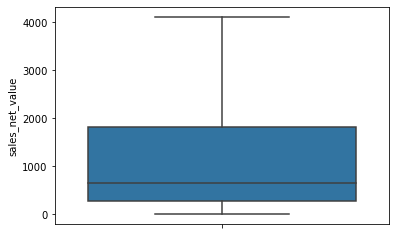

In [16]:
sns.boxplot(y=sales_data_Copy1["sales_net_value"],showfliers=False)

<AxesSubplot:ylabel='sales_quantity'>

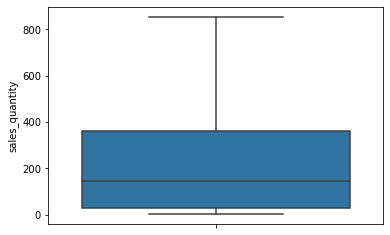

In [17]:
sns.boxplot(y=sales_data_Copy1["sales_quantity"],showfliers=False)

<AxesSubplot:ylabel='sales_gross_value'>

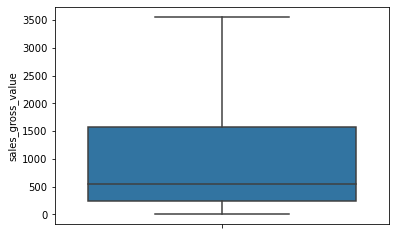

In [18]:
sns.boxplot(y=sales_data_Copy1["sales_gross_value"], showfliers=False)

<AxesSubplot:ylabel='tax_amount'>

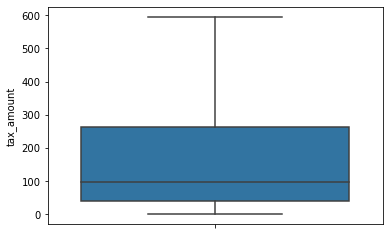

In [19]:
sns.boxplot(y=sales_data_Copy1["tax_amount"], showfliers=False)

<AxesSubplot:ylabel='scheme_discount'>

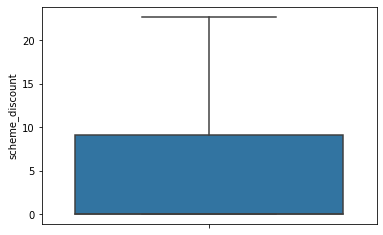

In [20]:
sns.boxplot(y=sales_data_Copy1["scheme_discount"], showfliers=False)

In [21]:
sales_data_Copy1.describe()

,distributorcode,retailer_code,sales_quantity,sales_gross_value,tax_amount,scheme_discount,sales_net_value
count,6.635110e+05,6.635110e+05,663511.000000,6.635110e+05,663511.000000,663511.000000,6.635110e+05
mean,1.056992e+06,9.541258e+12,654.114218,2.606769e+03,430.725220,52.723758,2.979443e+03
std,2.196378e+05,3.778508e+12,2493.799337,8.753927e+03,1489.249092,368.432075,1.001789e+04
min,1.000003e+06,2.371500e+09,1.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.004416e+06,1.000000e+13,30.000000,2.465500e+02,40.100000,0.000000,2.857100e+02
50%,1.008981e+06,1.010000e+13,144.000000,5.547000e+02,98.060000,0.000000,6.545500e+02
75%,1.013407e+06,1.010000e+13,360.000000,1.570990e+03,262.180000,9.080000,1.818750e+03
max,3.000356e+06,3.000000e+13,453168.000000,1.310067e+06,230199.740000,161408.900000,1.509087e+06


In [22]:
sales_data_Copy1[sales_data_Copy1.scheme_discount == 161408.900000]

,rsm,dsm,asm,soe,distributorcode,cityname,sales_invoice_date,invoice_no,retailer_code,categoryname,sales_quantity,sales_gross_value,tax_amount,scheme_discount,sales_net_value
475636,Z02R02,Z02R02D05,Z02R02D05A06,Z02R02D05A06E04,3000152,KOLKATA,2021-06-05,P2100308,3.000000e+13,Biscuits,4500,322817.8,29053.6,161408.9,190462.5


In [23]:
sales_data_Copy1[sales_data_Copy1.scheme_discount == 9.08]

,rsm,dsm,asm,soe,distributorcode,cityname,sales_invoice_date,invoice_no,retailer_code,categoryname,sales_quantity,sales_gross_value,tax_amount,scheme_discount,sales_net_value
14055,Z02R01,Z02R01D03,Z02R01D03A05,Z02R01D03A05S01,1001276,ROURKELA,2021-06-14,P2101071,1.000000e+13,Biscuits,10,302.66,52.85,9.08,346.43
26493,Z02R01,Z02R01D02,Z02R01D02A01,Z02R01D02A01E02,1014104,BARASAT,2021-06-27,P2102080,1.010000e+13,Biscuits,16,302.66,52.85,9.08,346.43
31012,Z02R01,Z02R01D03,Z02R01D03A02,Z02R01D03A02E02,1009315,BALUGAON,2021-06-22,P2100474,1.010000e+13,Biscuits,20,454.00,80.08,9.08,525.00
35408,Z02R01,Z02R01D03,Z02R01D03A04,Z02R01D03A04S06,1005098,Jajpur,2021-06-09,PPL50982101431,1.010000e+13,Biscuits,22,575.06,101.88,9.08,667.86
36066,Z02R01,Z02R01D01,Z02R01D01A06,Z02R01D01A06S04,1015103,Alamganj,2021-06-30,P51032100422,1.020000e+13,Biscuits,24,454.00,80.08,9.08,525.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496944,Z02R01,Z02R01D05,Z02R01D05A07,Z02R01D05A07S01,2001480,SAMBALPUR,2021-06-18,P2100959,2.000000e+13,Cakes,40,302.66,52.85,9.08,346.43
497064,Z02R02,Z02R02D05,Z02R02D05A06,Z02R02D05A06E03,3000226,RANCHI,2021-06-10,P2100112,1.010000e+13,Cakes,48,363.20,63.74,9.08,417.86
497597,Z02R02,Z02R02D05,Z02R02D05A06,Z02R02D05A06E03,3000085,Jamshedpur,2021-06-16,P2100026,3.000000e+13,Cakes,60,454.00,80.08,9.08,525.00
499348,Z02R01,Z02R01D03,Z02R01D03A04,Z02R01D03A04S06,1006171,Jajpur,2021-06-24,P2101311,1.010000e+13,Cakes,80,302.66,52.85,9.08,346.43


- schemes are not defined as per quantity
- how are schemes defined?
- is discount different for different retailer
- sales_gross_value and tax_amount
- is it different biscuit types that are leading to different values 
- is the scheme_discount based on retailer_category

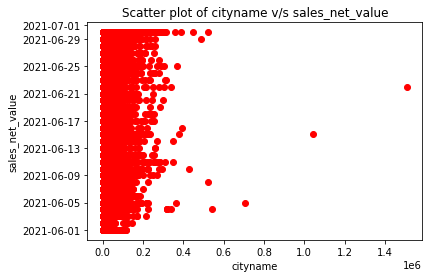

In [24]:
plt.scatter(sales_data_Copy1['sales_net_value'], sales_data_Copy1['sales_invoice_date'], c='red')
plt.title("Scatter plot of cityname v/s sales_net_value")
plt.xlabel('cityname')
plt.ylabel('sales_net_value')
plt.show()

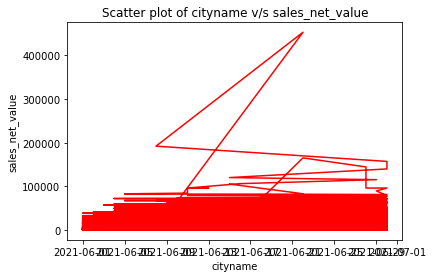

In [25]:
plt.plot(sales_data_Copy1['sales_invoice_date'], sales_data_Copy1['sales_quantity'], c='red')
plt.title("Scatter plot of cityname v/s sales_net_value")
plt.xlabel('cityname')
plt.ylabel('sales_net_value')
plt.show()

In [26]:
df1 = sales_data_Copy1[sales_data_Copy1['distributorcode'] == 1001276]
df1

,rsm,dsm,asm,soe,distributorcode,cityname,sales_invoice_date,invoice_no,retailer_code,categoryname,sales_quantity,sales_gross_value,tax_amount,scheme_discount,sales_net_value
14055,Z02R01,Z02R01D03,Z02R01D03A05,Z02R01D03A05S01,1001276,ROURKELA,2021-06-14,P2101071,1.000000e+13,Biscuits,10,302.66,52.85,9.08,346.43
20071,Z02R01,Z02R01D03,Z02R01D03A05,Z02R01D03A05S01,1001276,ROURKELA,2021-06-03,P2100839,1.000000e+13,Biscuits,12,46.22,8.32,0.00,54.55
21949,Z02R01,Z02R01D03,Z02R01D03A05,Z02R01D03A05S01,1001276,ROURKELA,2021-06-12,P2100995,1.000000e+13,Biscuits,14,53.93,9.71,0.00,63.64
21950,Z02R01,Z02R01D03,Z02R01D03A05,Z02R01D03A05S01,1001276,ROURKELA,2021-06-03,P2100842,1.000000e+13,Biscuits,14,53.93,9.71,0.00,63.64
21951,Z02R01,Z02R01D03,Z02R01D03A05,Z02R01D03A05S01,1001276,ROURKELA,2021-06-12,P2100913,1.000000e+13,Biscuits,14,53.93,9.71,0.00,63.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635488,Z02R01,Z02R01D03,Z02R01D03A05,Z02R01D03A05S01,1001276,ROURKELA,2021-06-23,P2101139,1.000000e+13,Snacks,168,600.00,69.84,18.00,651.84
646563,Z02R01,Z02R01D03,Z02R01D03A05,Z02R01D03A05S01,1001276,ROURKELA,2021-06-30,P2101144,1.000000e+13,Snacks,420,1674.11,192.86,66.96,1800.00
654165,Z02R01,Z02R01D03,Z02R01D03A05,Z02R01D03A05S01,1001276,ROURKELA,2021-06-19,P2101126,1.000000e+13,Snacks,1260,5022.32,578.57,200.89,5400.00
657896,Z02R01,Z02R01D03,Z02R01D03A05,Z02R01D03A05S01,1001276,ROURKELA,2021-06-19,P2101125,1.000000e+13,Snacks,2100,8370.53,964.29,334.82,9000.00


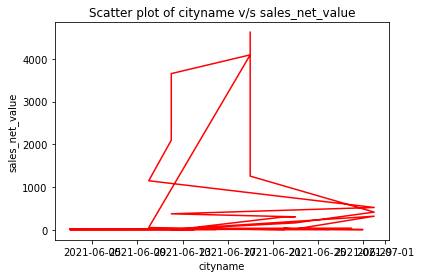

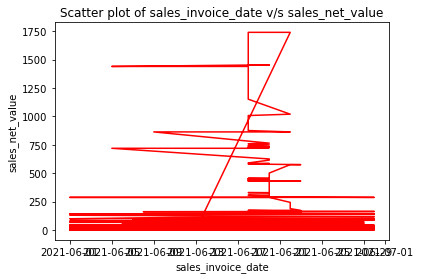

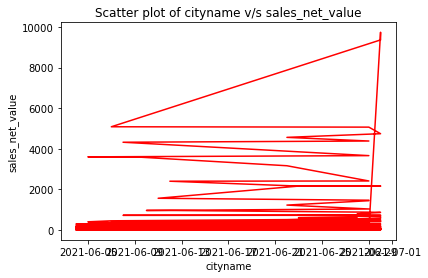

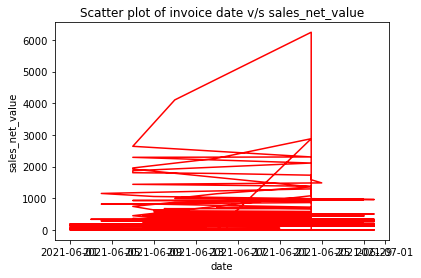

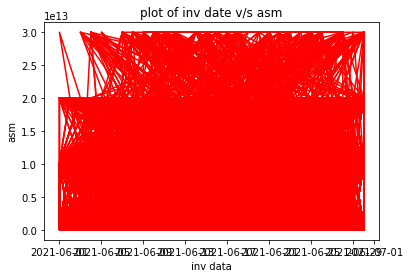

In [34]:
sales_data_Copy1 = sales_data_Copy1.sort_values(by='sales_invoice_date')

In [35]:
sales_data_Copy1.head(100)

,rsm,dsm,asm,soe,distributorcode,cityname,sales_invoice_date,invoice_no,retailer_code,categoryname,sales_quantity,sales_gross_value,tax_amount,scheme_discount,sales_net_value
369167,Z02R01,Z02R01D01,Z02R01D01A05,Z02R01D01A05E01,1009508,DURGAPUR,2021-06-01,P2100437,1.010000e+13,Biscuits,388,1043.97,187.91,0.0,1231.88
563944,Z02R05,Z02R05D02,Z02R05D02A06,Z02R05D02A06S07,1007816,JALALPUR,2021-06-01,P2102316,1.010000e+13,Confectionery,30,2344.72,281.37,0.0,2626.09
32731,Z02R01,Z02R01D01,Z02R01D01A01,Z02R01D01A01E03,1005257,KOLKATA,2021-06-01,P2101609,2.030000e+11,Biscuits,20,151.33,27.24,0.0,178.57
289269,Z02R05,Z02R05D02,Z02R05D02A02,Z02R05D02A02S07,1004149,TURKOLIYA,2021-06-01,P2101050,1.000000e+13,Biscuits,192,443.76,79.88,0.0,523.64
65811,Z02R01,Z02R01D01,Z02R01D01A01,Z02R01D01A01E04,1007052,KOLKATA,2021-06-01,P2106633,1.010000e+13,Biscuits,30,227.00,40.86,0.0,267.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563950,Z02R01,Z02R01D02,Z02R01D02A03,Z02R01D02A03E02,1009467,KANKINARA,2021-06-01,P2101424,1.010000e+13,Confectionery,30,1164.60,138.24,0.0,1290.26
493261,Z02R05,Z02R05D03,Z02R05D03A02,Z02R05D03A02E01,1002853,BEGUSARAI,2021-06-01,PPL740821157725,1.000000e+13,Cakes,6,45.40,8.17,0.0,53.57
547540,Z02R05,Z02R05D01,Z02R05D01A07,Z02R05D01A07S07,1008080,DANAPUR,2021-06-01,P2110664,1.010000e+13,Confectionery,6,232.92,27.95,0.0,260.87
397274,Z02R05,Z02R05D03,Z02R05D03A04,Z02R05D03A04S01,1001106,LADANIA,2021-06-01,P2101306,1.000000e+13,Biscuits,576,2218.80,399.38,0.0,2618.18


In [36]:
sales_data_Copy1 = sales_data_Copy1.drop(['rsm'],axis=1)

In [37]:
sales_data_Copy1 = sales_data_Copy1.drop(['dsm'],axis=1)


In [38]:
sales_data_Copy1=sales_data_Copy1.drop(['soe'],axis=1)
sales_data_Copy1=sales_data_Copy1.drop(['distributorcode'],axis=1)

In [39]:
sales_data_Copy1=sales_data_Copy1.drop(['asm'],axis=1)

In [40]:
sales_data_copy1 = sales_data_Copy1.drop(['cityname'],axis =1)
sales_data_copy1

,sales_invoice_date,invoice_no,retailer_code,categoryname,sales_quantity,sales_gross_value,tax_amount,scheme_discount,sales_net_value
369167,2021-06-01,P2100437,1.010000e+13,Biscuits,388,1043.97,187.91,0.00,1231.88
563944,2021-06-01,P2102316,1.010000e+13,Confectionery,30,2344.72,281.37,0.00,2626.09
32731,2021-06-01,P2101609,2.030000e+11,Biscuits,20,151.33,27.24,0.00,178.57
289269,2021-06-01,P2101050,1.000000e+13,Biscuits,192,443.76,79.88,0.00,523.64
65811,2021-06-01,P2106633,1.010000e+13,Biscuits,30,227.00,40.86,0.00,267.86
...,...,...,...,...,...,...,...,...,...
177649,2021-06-30,P11382102753,1.000000e+13,Biscuits,102,822.95,148.13,0.00,971.08
483148,2021-06-30,P2103941,1.000000e+13,Biscuits,7920,30508.47,4887.46,3355.93,32039.99
483147,2021-06-30,P2103936,1.000000e+13,Biscuits,7920,30508.47,4942.37,3050.85,32399.99
269175,2021-06-30,P2101489,1.010000e+13,Biscuits,192,443.76,79.88,0.00,523.64


In [41]:
sales_data_Copy1 = sales_data_Copy1.drop(['retailer_code'], axis=1)
sales_data_Copy1 = sales_data_Copy1.drop(['categoryname'], axis=1)
sales_data_Copy1 = sales_data_Copy1.drop(['invoice_no'], axis=1)

In [42]:
df1 = sales_data_Copy1[sales_data_Copy1['sales_invoice_date'] == '2021-06-30']
df1

,cityname,sales_invoice_date,sales_quantity,sales_gross_value,tax_amount,scheme_discount,sales_net_value
426113,MAIRWA,2021-06-30,900,3268.76,588.38,0.00,3857.14
448869,LALGANJ,2021-06-30,1440,5546.99,998.46,0.00,6545.45
426112,MAIRWA,2021-06-30,900,3268.76,588.38,0.00,3857.14
35591,Mansi,2021-06-30,22,65.57,11.80,0.00,77.37
433665,RANIGANJ,2021-06-30,963,2221.71,399.91,0.00,2621.62
...,...,...,...,...,...,...,...
177649,BARGARH,2021-06-30,102,822.95,148.13,0.00,971.08
483148,LALAPUR,2021-06-30,7920,30508.47,4887.46,3355.93,32039.99
483147,LALAPUR,2021-06-30,7920,30508.47,4942.37,3050.85,32399.99
269175,Fulhara,2021-06-30,192,443.76,79.88,0.00,523.64


In [43]:
sales_sum= df1['sales_quantity'].sum()
sales_grosssum= df1['sales_gross_value'].sum()
sales_tax_am = df1['tax_amount'].sum()
sales_net_sum= df1['sales_net_value'].sum()

In [44]:
print(sales_sum)
print(sales_grosssum)
print(sales_tax_am)
print(sales_net_sum)
firstrow = ([sales_sum,sales_grosssum,sales_tax_am,sales_net_sum])
firstrow

39536202
157379019.19
25515336.89
178595126.64


[39536202, 157379019.19, 25515336.89, 178595126.64]

In [45]:
dataFrame=pd.DataFrame(columns=['sum_sales_quantity','sum_gross_value','sum_tax_amount','sum_net_value'])
dataFrame
lastRow ={'sales_invoice_date':'2021-06-30','sum_sales_quantity':sales_sum,'sum_gross_value':sales_grosssum,'sum_tax_amount':sales_tax_am,'sum_net_value':sales_net_sum}
lastRow

{'sales_invoice_date': '2021-06-30',
 'sum_sales_quantity': 39536202,
 'sum_gross_value': 157379019.19,
 'sum_tax_amount': 25515336.89,
 'sum_net_value': 178595126.64}

In [46]:
from datetime import date, timedelta


def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)
        
dataFrameSummary = pd.DataFrame(columns=['sales_invoice_date','sum_sales_quantity','sum_gross_value','sum_tax_amount','sum_net_value'])
start_date = date(2021, 6, 1)
end_date = date(2021, 6, 30)

for single_date in daterange(start_date, end_date):
    df1 = sales_data_Copy1[sales_data_Copy1['sales_invoice_date'] == single_date.strftime("%Y-%m-%d")]
    sales_date = (single_date.strftime("%Y-%m-%d"))
    sales_sum= df1['sales_quantity'].sum()
    sales_grosssum= df1['sales_gross_value'].sum()
    sales_tax_am = df1['tax_amount'].sum()
    sales_net_sum= df1['sales_net_value'].sum() 
    firstRow ={'sales_invoice_date':sales_date,'sum_sales_quantity':sales_sum,'sum_gross_value':sales_grosssum,'sum_tax_amount':sales_tax_am,'sum_net_value':sales_net_sum}
    dataFrameSummary = dataFrameSummary.append(firstRow,ignore_index = True)
    

In [47]:
dataFrameSummary

,sales_invoice_date,sum_sales_quantity,sum_gross_value,sum_tax_amount,sum_net_value
0,2021-06-01,4165036,15498085.10,2678525.72,1.813818e+07
1,2021-06-02,2868512,10723039.24,1838717.83,1.248374e+07
2,2021-06-03,9000825,33019044.05,5639376.09,3.821438e+07
3,2021-06-04,10691127,41598905.77,7006254.73,4.782366e+07
4,2021-06-05,13025136,50212904.98,8301756.57,5.717722e+07
5,2021-06-06,6997543,27459026.46,4580945.90,3.132236e+07
6,2021-06-07,16365975,61704115.82,10225825.68,7.051506e+07
7,2021-06-08,15463889,59797856.90,9950810.75,6.844955e+07
8,2021-06-09,17980156,67805791.82,11208416.74,7.749919e+07
9,2021-06-10,16050076,61796593.03,10171094.42,7.055283e+07


In [48]:
dataFrameSummary = dataFrameSummary.append(lastRow,ignore_index = True)

In [49]:
dataFrame

,sum_sales_quantity,sum_gross_value,sum_tax_amount,sum_net_value


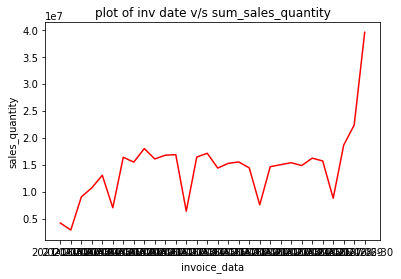

In [51]:
plt.plot(dataFrameSummary['sales_invoice_date'], dataFrameSummary['sum_sales_quantity'], c='red')
plt.title("plot of inv date v/s sum_sales_quantity")
plt.xlabel('invoice_data')
plt.ylabel('sales_quantity')
plt.show()

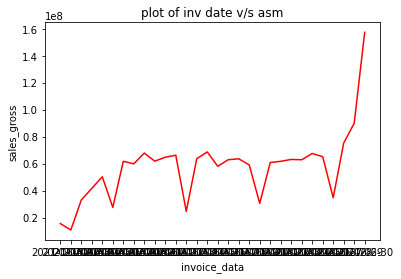

In [52]:
plt.plot(dataFrameSummary['sales_invoice_date'], dataFrameSummary['sum_gross_value'], c='red')
plt.title("plot of inv date v/s asm")
plt.xlabel('invoice_data')
plt.ylabel('sales_gross')
plt.show()

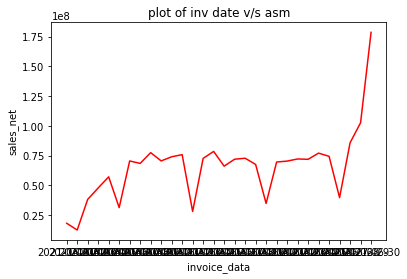

In [53]:
plt.plot(dataFrameSummary['sales_invoice_date'], dataFrameSummary['sum_net_value'], c='red')
plt.title("plot of inv date v/s asm")
plt.xlabel('invoice_data')
plt.ylabel('sales_net')
plt.show()

- There's a big increse in billing quantities at the end of the month
- start of the month is very low when compared to the end of the month
- We are unable to periodically track the orders because of this huge differences in the start and end of the month. This incomplete tracking can impact the supply-chain
- drops in quantity can be observed every 7th day. As the month of June starts with a Tuesday, every Sunday we can see a drop
-  Questions we need answered:
   -- Why is there a spike at the month end?
   -- Why are there drops?

In [54]:
sales_data_copy2 

,rsm,dsm,asm,soe,distributorcode,cityname,sales_invoice_date,invoice_no,retailer_code,categoryname,sales_quantity,sales_gross_value,tax_amount,scheme_discount,sales_net_value
0,Z02R05,Z02R05D02,Z02R05D02A02,Z02R05D02A02S08,1004438,ADAPUR,2021-06-22,P2102428,1.000000e+13,Biscuits,1,7.70,1.39,0.00,9.09
1,Z02R05,Z02R05D02,Z02R05D02A02,Z02R05D02A02S08,1004438,ADAPUR,2021-06-28,P2102591,1.000000e+13,Biscuits,1,3.85,0.69,0.00,4.55
2,Z02R05,Z02R05D02,Z02R05D02A02,Z02R05D02A02S08,1004438,ADAPUR,2021-06-23,P2102451,1.000000e+13,Biscuits,1,7.57,1.36,0.00,8.93
3,Z02R04,Z02R04D04,Z02R04D04A01,Z02R04D04A01S03,1006646,Agartala,2021-06-29,P2101115,1.010000e+13,Biscuits,1,113.50,20.43,0.00,133.93
4,Z02R04,Z02R04D04,Z02R04D04A01,Z02R04D04A01S03,1006646,Agartala,2021-06-13,P2100740,1.010000e+13,Biscuits,1,3.78,0.68,0.00,4.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663506,Z02R04,Z02R04D04,Z02R04D04A07,Z02R04D04A07S03,1010573,MANKACHAR,2021-06-30,P2100171,1.010000e+13,Snacks,64200,222526.85,25101.03,13351.61,234276.26
663507,Z02R04,Z02R04D04,Z02R04D04A07,Z02R04D04A07S04,1012812,Nalbari,2021-06-23,P2100108,1.010000e+13,Snacks,64800,221014.27,24930.41,13260.86,232683.82
663508,Z02R04,Z02R04D04,Z02R04D04A07,Z02R04D04A07S04,1012812,Nalbari,2021-06-17,P2100101,1.010000e+13,Snacks,69120,235748.55,26592.44,14144.91,248196.08
663510,Z02R05,Z02R05D01,Z02R05D01A03,Z02R05D01A03E01,1002511,SINGHIA GHAT,2021-06-22,P2101315,1.000000e+13,Snacks,82869,324324.17,36583.77,19459.45,341448.49


In [55]:
sales_Copy_Rourkela = sales_data_copy2[sales_data_copy2['sales_invoice_date'] == '2021-06-30' ]
sales_Copy_Rourkela = sales_data_copy2[sales_data_copy2['cityname'] == "ROURKELA"]

In [56]:
sales_Copy_Rourkela = sales_Copy_Rourkela.sort_values('sales_invoice_date')

In [57]:
sales_Copy_Rourkela

,rsm,dsm,asm,soe,distributorcode,cityname,sales_invoice_date,invoice_no,retailer_code,categoryname,sales_quantity,sales_gross_value,tax_amount,scheme_discount,sales_net_value
136676,Z02R01,Z02R01D03,Z02R01D03A05,Z02R01D03A05E02,1015926,ROURKELA,2021-06-02,P2100993,1.010000e+13,Biscuits,68,1316.59,236.99,0.0,1553.57
379760,Z02R01,Z02R01D03,Z02R01D03A05,Z02R01D03A05E02,1015926,ROURKELA,2021-06-02,P2101009,1.010000e+13,Biscuits,434,3485.54,627.40,0.0,4112.93
314612,Z02R01,Z02R01D03,Z02R01D03A05,Z02R01D03A05E02,1015926,ROURKELA,2021-06-02,P2101007,1.010000e+13,Biscuits,258,2048.72,368.77,0.0,2417.49
550053,Z02R01,Z02R01D03,Z02R01D03A05,Z02R01D03A05E02,1014486,ROURKELA,2021-06-02,P2102743,1.010000e+13,Confectionery,6,232.92,27.95,0.0,260.87
88110,Z02R01,Z02R01D03,Z02R01D03A05,Z02R01D03A05E02,1015926,ROURKELA,2021-06-02,P2101012,1.010000e+13,Biscuits,45,727.21,130.90,0.0,858.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54965,Z02R01,Z02R01D03,Z02R01D03A05,Z02R01D03A05E02,1014486,ROURKELA,2021-06-30,P2104009,1.010000e+13,Biscuits,24,90.80,16.34,0.0,107.14
54966,Z02R01,Z02R01D03,Z02R01D03A05,Z02R01D03A05E02,1014486,ROURKELA,2021-06-30,P2104010,1.010000e+13,Biscuits,24,54.97,9.89,0.0,64.86
54967,Z02R01,Z02R01D03,Z02R01D03A05,Z02R01D03A05E02,1014486,ROURKELA,2021-06-30,P2104025,1.010000e+13,Biscuits,24,54.97,9.89,0.0,64.86
296713,Z02R01,Z02R01D03,Z02R01D03A05,Z02R01D03A05E02,1009863,ROURKELA,2021-06-30,P2101073,1.010000e+13,Biscuits,204,1012.78,182.30,0.0,1195.09


In [58]:
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)
        
dataFrameRourkela = pd.DataFrame(columns=['sales_invoice_date','sum_sales_quantity','sum_gross_value','sum_tax_amount','sum_net_value'])
start_date = date(2021, 6, 1)
end_date = date(2021, 6, 30)

for single_date in daterange(start_date, end_date):
    df2 = sales_Copy_Rourkela[sales_Copy_Rourkela['sales_invoice_date'] == single_date.strftime("%Y-%m-%d")]
    sales_date = (single_date.strftime("%Y-%m-%d"))
    sales_sum= df2['sales_quantity'].sum()
    sales_grosssum= df2['sales_gross_value'].sum()
    sales_tax_am = df2['tax_amount'].sum()
    sales_net_sum= df2['sales_net_value'].sum() 
    firstRow ={'sales_invoice_date':sales_date,'sum_sales_quantity':sales_sum,'sum_gross_value':sales_grosssum,'sum_tax_amount':sales_tax_am,'sum_net_value':sales_net_sum}
    dataFrameRourkela = dataFrameRourkela.append(firstRow,ignore_index = True)

In [59]:
dataFrameRourkela

,sales_invoice_date,sum_sales_quantity,sum_gross_value,sum_tax_amount,sum_net_value
0,2021-06-01,0,0.00,0.00,0.00
1,2021-06-02,33524,167203.34,29661.48,196030.65
2,2021-06-03,10414,63169.82,11124.54,73727.81
3,2021-06-04,9892,63683.73,9501.48,72416.35
4,2021-06-05,45569,247135.66,36507.90,274701.20
5,2021-06-06,4993,47998.12,8557.61,56449.35
6,2021-06-07,13498,71023.81,12413.57,82143.36
7,2021-06-08,15976,86194.37,14281.64,99341.74
8,2021-06-09,37699,203797.44,34021.57,235132.20
9,2021-06-10,25695,192924.36,33582.09,224673.66


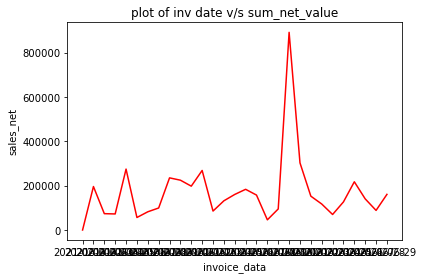

In [60]:
plt.plot(dataFrameRourkela['sales_invoice_date'], dataFrameRourkela['sum_net_value'], c='red')
plt.title("plot of inv date v/s sum_net_value")
plt.xlabel('invoice_data')
plt.ylabel('sales_net')
plt.show()

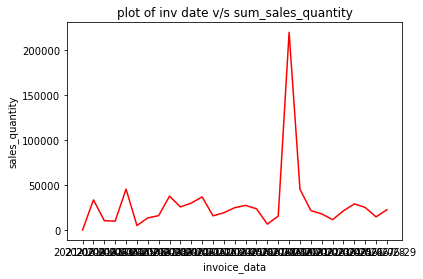

In [61]:
plt.plot(dataFrameRourkela['sales_invoice_date'], dataFrameRourkela['sum_sales_quantity'], c='red')
plt.title("plot of inv date v/s sum_sales_quantity")
plt.xlabel('invoice_data')
plt.ylabel('sales_quantity')
plt.show()

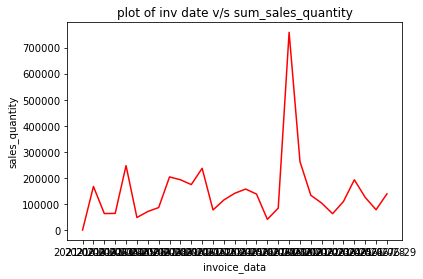

In [62]:
plt.plot(dataFrameRourkela['sales_invoice_date'], dataFrameRourkela['sum_gross_value'], c='red')
plt.title("plot of inv date v/s sum_sales_quantity")
plt.xlabel('invoice_data')
plt.ylabel('sales_quantity')
plt.show()

In [63]:
sales_Copy_Kolkata = sales_data_copy2[sales_data_copy2['sales_invoice_date'] == '2021-06-30' ]
sales_Copy_Kolkata = sales_data_copy2[sales_data_copy2['cityname'] == "KOLKATA"]
sales_Copy_Kolkata = sales_Copy_Kolkata.sort_values('sales_invoice_date')

In [64]:
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)
        
dataFrameKolkata = pd.DataFrame(columns=['sales_invoice_date','sum_sales_quantity','sum_gross_value','sum_tax_amount','sum_net_value'])
start_date = date(2021, 6, 1)
end_date = date(2021, 6, 30)

for single_date in daterange(start_date, end_date):
    df3 = sales_Copy_Kolkata[sales_Copy_Kolkata['sales_invoice_date'] == single_date.strftime("%Y-%m-%d")]
    sales_date1 = (single_date.strftime("%Y-%m-%d"))
    sales_sum1= df3['sales_quantity'].sum()
    sales_grosssum1= df3['sales_gross_value'].sum()
    sales_tax_am1 = df3['tax_amount'].sum()
    sales_net_sum1= df3['sales_net_value'].sum() 
    firstRow ={'sales_invoice_date':sales_date1,'sum_sales_quantity':sales_sum1,'sum_gross_value':sales_grosssum1,'sum_tax_amount':sales_tax_am,'sum_net_value':sales_net_sum1}
    dataFrameKolkata = dataFrameKolkata.append(firstRow,ignore_index = True)


In [65]:
dataFrameKolkata

,sales_invoice_date,sum_sales_quantity,sum_gross_value,sum_tax_amount,sum_net_value
0,2021-06-01,164037,717178.35,23350.43,839383.81
1,2021-06-02,159140,662461.96,23350.43,771797.19
2,2021-06-03,209249,892013.29,23350.43,1032035.03
3,2021-06-04,231107,1459997.87,23350.43,1666262.24
4,2021-06-05,481757,2111671.98,23350.43,2236528.99
5,2021-06-06,84817,316871.83,23350.43,362578.02
6,2021-06-07,461561,1935385.35,23350.43,2186233.55
7,2021-06-08,403439,1655732.32,23350.43,1852868.92
8,2021-06-09,417137,1687146.19,23350.43,1903128.62
9,2021-06-10,520240,2001337.17,23350.43,2257793.89


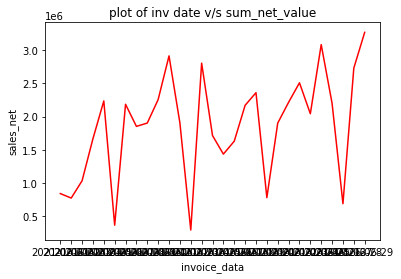

In [66]:
plt.plot(dataFrameKolkata['sales_invoice_date'], dataFrameKolkata['sum_net_value'], c='red')
plt.title("plot of inv date v/s sum_net_value")
plt.xlabel('invoice_data')
plt.ylabel('sales_net')
plt.show()

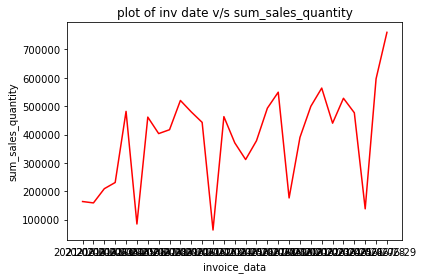

In [67]:
plt.plot(dataFrameKolkata['sales_invoice_date'], dataFrameKolkata['sum_sales_quantity'], c='red')
plt.title("plot of inv date v/s sum_sales_quantity")
plt.xlabel('invoice_data')
plt.ylabel('sum_sales_quantity')
plt.show()

In [68]:
sales_Copy_Agartala = sales_data_copy2[sales_data_copy2['sales_invoice_date'] == '2021-06-30' ]
sales_Copy_Agartala = sales_data_copy2[sales_data_copy2['cityname'] == "Agartala"]
sales_Copy_Agartala = sales_Copy_Agartala.sort_values('sales_invoice_date')


def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n);


dataFrameAgartala = pd.DataFrame(columns=['sales_invoice_date','sum_sales_quantity','sum_gross_value','sum_tax_amount','sum_net_value'])
start_date = date(2021, 6, 1)
end_date = date(2021, 6, 30)


for single_date in daterange(start_date, end_date):
    df3 = sales_Copy_Agartala[sales_Copy_Agartala['sales_invoice_date'] == single_date.strftime("%Y-%m-%d")]
    sales_date1 = (single_date.strftime("%Y-%m-%d"))
    sales_sum1= df3['sales_quantity'].sum()
    sales_grosssum1= df3['sales_gross_value'].sum()
    sales_tax_am1 = df3['tax_amount'].sum()
    sales_net_sum1= df3['sales_net_value'].sum() 
    firstRow ={'sales_invoice_date':sales_date1,'sum_sales_quantity':sales_sum1,'sum_gross_value':sales_grosssum1,'sum_tax_amount':sales_tax_am,'sum_net_value':sales_net_sum1}
    dataFrameAgartala = dataFrameAgartala.append(firstRow,ignore_index = True)

In [69]:
dataFrameAgartala

,sales_invoice_date,sum_sales_quantity,sum_gross_value,sum_tax_amount,sum_net_value
0,2021-06-01,4236,24248.39,23350.43,28294.18
1,2021-06-02,13403,53741.80,23350.43,60830.63
2,2021-06-03,0,0.00,23350.43,0.00
3,2021-06-04,38415,169789.87,23350.43,194520.57
4,2021-06-05,11957,66425.40,23350.43,76359.67
5,2021-06-06,15730,63177.70,23350.43,70777.89
6,2021-06-07,32699,165464.38,23350.43,189057.87
7,2021-06-08,27099,126027.08,23350.43,144725.15
8,2021-06-09,46264,254432.20,23350.43,291093.07
9,2021-06-10,57245,269459.32,23350.43,305428.02


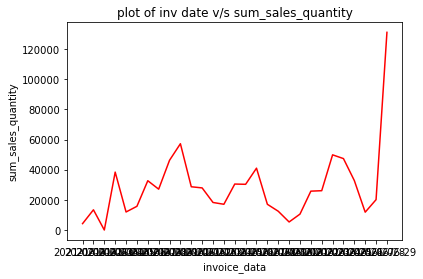

In [70]:
plt.plot(dataFrameAgartala['sales_invoice_date'], dataFrameAgartala['sum_sales_quantity'], c='red')
plt.title("plot of inv date v/s sum_sales_quantity")
plt.xlabel('invoice_data')
plt.ylabel('sum_sales_quantity')
plt.show()

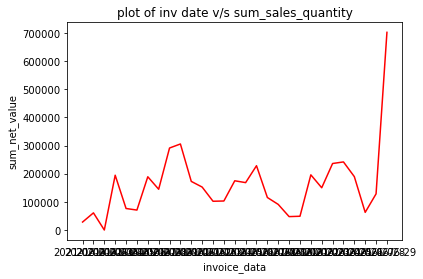

In [71]:
plt.plot(dataFrameAgartala['sales_invoice_date'], dataFrameAgartala['sum_net_value'], c='red')
plt.title("plot of inv date v/s sum_sales_quantity")
plt.xlabel('invoice_data')
plt.ylabel('sum_net_value')
plt.show()

In [72]:
sales_Copy_Agartala = sales_data_copy2[sales_data_copy2['sales_invoice_date'] == '2021-06-30' ]
sales_Copy_Meirwa = sales_data_copy2[sales_data_copy2['cityname'] == "MAIRWA"]
sales_Copy_Meirwa = sales_Copy_Meirwa.sort_values('sales_invoice_date')


def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n);


dataFrameMairwa = pd.DataFrame(columns=['sales_invoice_date','sum_sales_quantity','sum_gross_value','sum_tax_amount','sum_net_value'])
start_date = date(2021, 6, 1)
end_date = date(2021, 6, 30)


for single_date in daterange(start_date, end_date):
    df3 = sales_Copy_Meirwa[sales_Copy_Meirwa['sales_invoice_date'] == single_date.strftime("%Y-%m-%d")]
    sales_date1 = (single_date.strftime("%Y-%m-%d"))
    sales_sum1= df3['sales_quantity'].sum()
    sales_grosssum1= df3['sales_gross_value'].sum()
    sales_tax_am1 = df3['tax_amount'].sum()
    sales_net_sum1= df3['sales_net_value'].sum() 
    firstRow ={'sales_invoice_date':sales_date1,'sum_sales_quantity':sales_sum1,'sum_gross_value':sales_grosssum1,'sum_tax_amount':sales_tax_am,'sum_net_value':sales_net_sum1}
    dataFrameMairwa = dataFrameMairwa.append(firstRow,ignore_index = True)

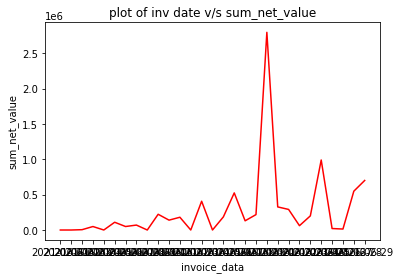

In [73]:
plt.plot(dataFrameMairwa['sales_invoice_date'], dataFrameMairwa['sum_net_value'], c='red')
plt.title("plot of inv date v/s sum_net_value")
plt.xlabel('invoice_data')
plt.ylabel('sum_net_value')
plt.show()

In [74]:
sales_Copy_Agartala = sales_data_copy2[sales_data_copy2['sales_invoice_date'] == '2021-06-30' ]
sales_Copy_adapur = sales_data_copy2[sales_data_copy2['cityname'] == "ADAPUR"]
sales_Copy_adapur = sales_Copy_Meirwa.sort_values('sales_invoice_date')


def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n);


dataFrameAdapur = pd.DataFrame(columns=['sales_invoice_date','sum_sales_quantity','sum_gross_value','sum_tax_amount','sum_net_value'])
start_date = date(2021, 6, 1)
end_date = date(2021, 6, 30)


for single_date in daterange(start_date, end_date):
    df3 = sales_Copy_adapur[sales_Copy_adapur['sales_invoice_date'] == single_date.strftime("%Y-%m-%d")]
    sales_date1 = (single_date.strftime("%Y-%m-%d"))
    sales_sum1= df3['sales_quantity'].sum()
    sales_grosssum1= df3['sales_gross_value'].sum()
    sales_tax_am1 = df3['tax_amount'].sum()
    sales_net_sum1= df3['sales_net_value'].sum() 
    firstRow ={'sales_invoice_date':sales_date1,'sum_sales_quantity':sales_sum1,'sum_gross_value':sales_grosssum1,'sum_tax_amount':sales_tax_am,'sum_net_value':sales_net_sum1}
    dataFrameAdapur = dataFrameAdapur.append(firstRow,ignore_index = True)

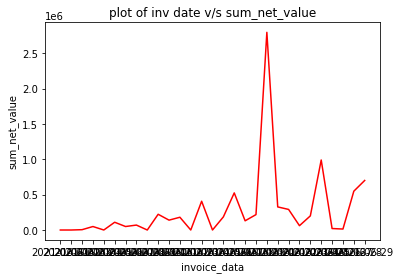

In [75]:
plt.plot(dataFrameAdapur['sales_invoice_date'], dataFrameAdapur['sum_net_value'], c='red')
plt.title("plot of inv date v/s sum_net_value")
plt.xlabel('invoice_data')
plt.ylabel('sum_net_value')
plt.show()

- Even though there are spikes in certain areas in the middle of the month, there must be enough areas that spike in the end to give us a graph that looks like the summary


In [76]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(dataFrameSummary['sum_net_value'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] > 0.05:
    print('Series is not Stationary')
else:
    print('Series is Stationary')


# KPSS Test
stats, p, lags, critical_values = kpss(dataFrameSummary['sum_net_value'], 'ct')
print(f'KPSS Test Statistics: {stats}')
print(f'p-value: {p}')

if p<0.05:
      print('Series is not Stationary')
else:
      print('Series is Stationary')

ADF Statistic: 3.2486271458976743
p-value: 1.0
Series is not Stationary
KPSS Test Statistics: 0.11248717667509227
p-value: 0.1
Series is Stationary


C:\Users\deept\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\deept\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


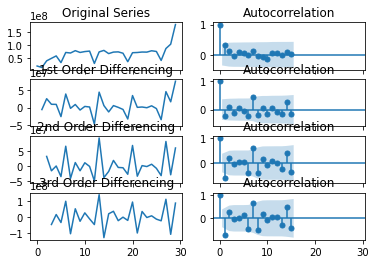

In [77]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Original Series

fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(dataFrameSummary['sum_net_value']); axes[0, 0].set_title('Original Series')
plot_acf(dataFrameSummary['sum_net_value'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(dataFrameSummary['sum_net_value'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(dataFrameSummary['sum_net_value'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(dataFrameSummary['sum_net_value'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(dataFrameSummary['sum_net_value'].diff().diff().dropna(), ax=axes[2, 1])

axes[3, 0].plot(dataFrameSummary['sum_net_value'].diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(dataFrameSummary['sum_net_value'].diff().diff().diff().dropna(), ax=axes[3, 1])

plt.show()

In [78]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(dataFrameSummary.sum_net_value, order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:          sum_net_value   No. Observations:                   30
Model:                     ARMA(1, 0)   Log Likelihood                -554.215
Method:                       css-mle   S.D. of innovations       25218574.127
Date:                Mon, 25 Oct 2021   AIC                           1114.431
Time:                        11:33:29   BIC                           1118.634
Sample:                             0   HQIC                          1115.775
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 6.59e+07    1.5e+07      4.390      0.000    3.65e+07    9.53e+07
ar.L1.sum_net_value     0.7126      0.209      3.416      0.001       0.304       1.121
                

C:\Users\deept\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


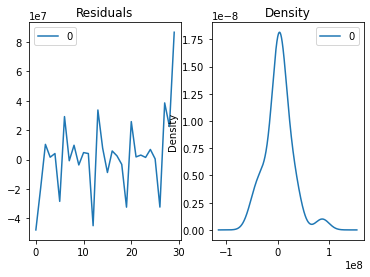

In [79]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

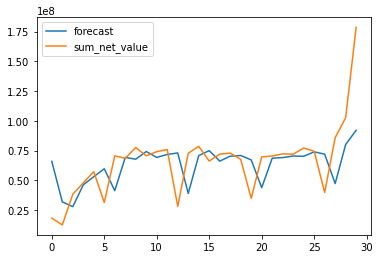

In [80]:
model_fit.plot_predict(dynamic=False)
plt.show()

C:\Users\deept\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

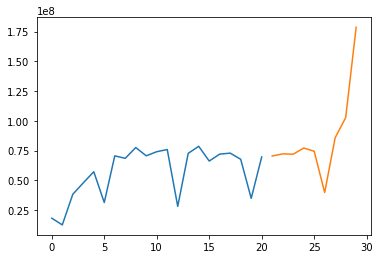

In [81]:
data = dataFrameSummary.copy()

train = data[:int(0.7*(len(data)))]
valid = data[int(0.7*(len(data))):]

#preprocessing (since arima takes univariate series as input)
train.drop('sum_sales_quantity',axis=1,inplace=True)
train.drop('sum_gross_value', axis =1, inplace = True)
train.drop('sum_tax_amount', axis =1, inplace = True)
train.drop('sales_invoice_date', axis =1, inplace = True)
valid.drop('sum_sales_quantity',axis=1,inplace=True)
valid.drop('sum_gross_value', axis =1, inplace = True)
valid.drop('sum_tax_amount', axis =1, inplace = True)
valid.drop('sales_invoice_date', axis =1, inplace = True)

#plotting the data
train['sum_net_value'].plot()
valid['sum_net_value'].plot()

In [82]:
train

,sum_net_value
0,18138176.34
1,12483735.20
2,38214379.73
3,47823660.84
4,57177216.72
5,31322359.05
6,70515059.96
7,68449552.16
8,77499186.68
9,70552834.96


C:\Users\deept\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:        D.sum_net_value   No. Observations:                   20
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -364.381
Method:                       css-mle   S.D. of innovations       19655307.605
Date:                Mon, 25 Oct 2021   AIC                            734.763
Time:                        11:35:03   BIC                            737.750
Sample:                             1   HQIC                           735.346
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.573e+06   3.05e+06      0.844      0.399    -3.4e+06    8.55e+06
ar.L1.D.sum_net_value    -0.4711      0.202     -2.337      0.019      -0.866      -0.076
        

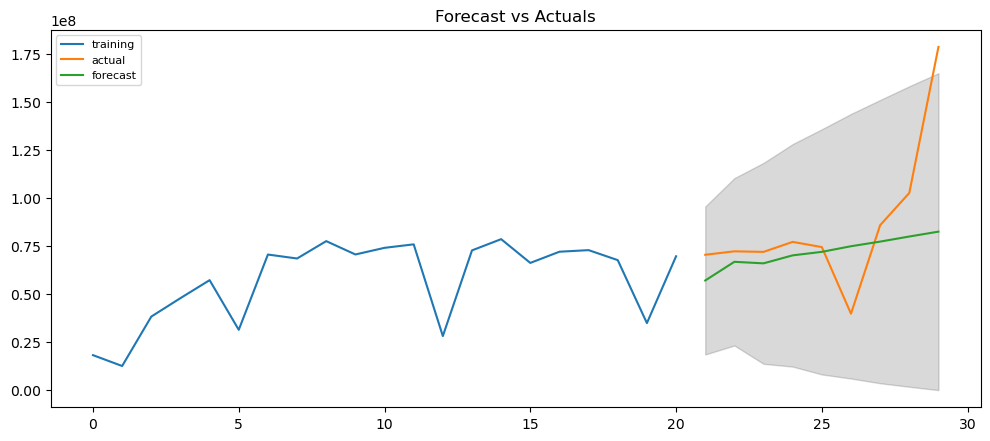

In [83]:
# Build Model
model = ARIMA(train, order=(1, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(9, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=valid.index)
lower_series = pd.Series(conf[:, 0], index=valid.index)
upper_series = pd.Series(conf[:, 1], index=valid.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(valid, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [84]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    #corr = np.corrcoef(forecast, actual)[0,1]   # corr
    #mins = np.amin(np.hstack([forecast[:,None],actual[:,None]]), axis=1)
    #maxs = np.amax(np.hstack([forecast[:,None],actual[:,None]]), axis=1)
    #minmax = 1 - np.mean(mins/maxs)            # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, valid.values)

{'mape': 0.2561132236947475,
 'me': -14061393.328174321,
 'mae': 23955170.69275395,
 'mpe': -0.038323812403737785,
 'rmse': 39605138.40964586}

In [85]:
from pmdarima.arima import auto_arima

In [87]:
aima_model = auto_arima(train, start_p=0, d=1,start_q=0,max_p=5,max_d=5,max_q=5, start_P=0,D=1,start_Q=0,max_P=5,max_D=5, max_Q=5,
                       m=12,seasonal=True,error_action='warn', trace=True, suppress_warnings=True,stepwise=True,random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=305.992, Time=0.83 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=300.897, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=300.559, Time=0.01 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=299.563, Time=0.08 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=301.563, Time=0.20 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=301.563, Time=0.07 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=303.563, Time=0.10 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=inf, Time=0.05 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=301.152, Time=0.08 sec


C:\Users\deept\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(0,1,2)(1,1,0)[12]           (if you do not want to see these warnings, run with error_action="ignore").
  warnings.warn(warning_str, ModelFitWarning)


 ARIMA(0,1,2)(1,1,0)[12]             : AIC=inf, Time=nan sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(1,1,0)[12] intercept   : AIC=302.371, Time=0.06 sec

Best model:  ARIMA(0,1,1)(1,1,0)[12]          
Total fit time: 3.148 seconds


C:\Users\deept\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(1,1,2)(1,1,0)[12]           (if you do not want to see these warnings, run with error_action="ignore").
  warnings.warn(warning_str, ModelFitWarning)


In [89]:
aima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   21
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -146.781
Date:                             Mon, 25 Oct 2021   AIC                            299.563
Time:                                     11:52:33   BIC                            299.801
Sample:                                          0   HQIC                           297.955
                                              - 21                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7376      3.354     -0.220      0.826      -7.312       5.837
ar.S.L12      -0.8608      1.033     -0.833      0.405      -2.886       1.165
sigma2      1.068e+15   6.04e-16   1.77e+30      0.000    1.07e+15    1.07e+15
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.00
Prob(Q):                              0.90   Prob(JB):                         0.22
Heteroskedasticity (H):               3.99   Skew:                            -1.40
Prob(H) (two-sided):                  0.29   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.41e+48. Standard errors may be unstable.
"""

In [104]:
prediction = pd.DataFrame(aima_model.predict(n_periods=9),index=valid.index)
prediction.columns=['Predicted_Values']
prediction

,Predicted_Values
21,6.433645e+07
22,6.481742e+07
23,6.506996e+07
24,7.403719e+07
25,7.537816e+07
26,9.834192e+07
27,1.048916e+08
28,1.137548e+08
29,9.161321e+07


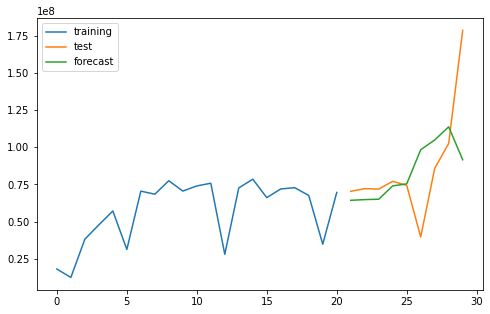

In [108]:
plt.figure(figsize=(8,5))
plt.plot(train, label="training")
plt.plot(valid, label="test")
plt.plot(prediction, label ='forecast')
plt.legend(loc='upper left')
plt.show()

In [112]:
from sklearn.metrics import r2_score
valid['predicted_sum_net'] = prediction
r2_score(valid['sum_net_value'], valid['predicted_sum_net'])

<ipython-input-112-eaec869b2924>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predicted_sum_net'] = prediction


0.016592485418823744

In [116]:
mape = np.mean(np.abs(valid['sum_net_value'] - valid['predicted_sum_net'])/np.abs(valid['predicted_sum_net']))
mape

0.24369000334913313